In [1]:
#import the pandas library
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
#load dataset
df=pd.read_csv('Crime_Data_preprocessed.csv')
df

,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Martial Status,Income Level,Occupation
0,2,624,BATTERY - SIMPLE ASSAULT,0416,26,M,H,502.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,Married,Low Middle,Unemployed
1,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,0913 2024 1817 0360 1258 0507,8,F,H,501.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,Single,Low Income,Student
2,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1251 1258 0913 0400 0500 0522 1817,7,F,W,502.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,Single,Low Income,Student
3,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1309 0400,31,F,O,101.0,307.0,VEHICLE,AA,Adult Arrest,230.0,Relationship,Low Middle,Manual Labor
4,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1259 0913 1817 1801 0503,12,F,H,502.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812.0,Single,Low Income,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323511,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 1822 1310 0416,36,M,H,101.0,207.0,OTHER KNIFE,IC,Invest Cont,230.0,Married,Upper Middle,Engineer
323512,2,624,BATTERY - SIMPLE ASSAULT,2047 0400 0429 0444 1202 1822,80,F,O,124.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,Separated,Upper Middle,Retired
323513,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344,46,M,H,223.0,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,341.0,Divorced,Middle,Self Employed
323514,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,0,X,X,503.0,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,745.0,Single,Low Income,Student


In [2]:
df['Status'].value_counts()

Status
IC    189375
AO     76959
AA     53493
JA      2451
JO      1236
CC         2
Name: count, dtype: int64

In [3]:
#Check the shape
df.shape

(323516, 16)

In [4]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323516 entries, 0 to 323515
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Part 1-2        323516 non-null  int64  
 1   Crm Cd          323516 non-null  int64  
 2   Crm Cd Desc     323516 non-null  object 
 3   Mocodes         323516 non-null  object 
 4   Vict Age        323516 non-null  int64  
 5   Vict Sex        323516 non-null  object 
 6   Vict Descent    323516 non-null  object 
 7   Premis Cd       323516 non-null  float64
 8   Weapon Used Cd  323516 non-null  float64
 9   Weapon Desc     323516 non-null  object 
 10  Status          323516 non-null  object 
 11  Status Desc     323516 non-null  object 
 12  Crm Cd 1        323516 non-null  float64
 13  Martial Status  323516 non-null  object 
 14  Income Level    323516 non-null  object 
 15  Occupation      323516 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 39.5+ 

In [5]:
#Convert all object type columns to integer as whole
df[df.select_dtypes(['object']).columns]=df.select_dtypes(['object']).apply(lambda x :pd.factorize(x)[0])

In [11]:
df

,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Martial Status,Income Level,Occupation,Health Status
0,2,624,0,0,26,0,0,502.0,400.0,0,0,0,624.0,0,0,0,0
1,1,821,1,1,8,1,0,501.0,400.0,0,0,0,812.0,1,1,1,1
2,2,812,2,2,7,1,1,502.0,400.0,0,0,0,812.0,1,1,1,1
3,1,230,3,3,31,1,2,101.0,307.0,1,1,1,230.0,2,0,2,2
4,2,812,2,4,12,1,0,502.0,400.0,0,2,2,812.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323511,1,230,3,196254,36,0,0,101.0,207.0,14,0,0,230.0,0,3,5,7
323512,2,624,0,196255,80,1,2,124.0,400.0,0,0,0,624.0,5,3,4,8
323513,1,341,30,64,46,0,0,223.0,500.0,2,0,0,341.0,4,2,3,6
323514,2,745,23,19074,0,2,7,503.0,500.0,2,0,0,745.0,1,1,1,1


In [7]:
#import the numpy library
import numpy as np
#Distribute Features and target column
X=df.values
Y=df['Status'].values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323516 entries, 0 to 323515
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Part 1-2        323516 non-null  int64  
 1   Crm Cd          323516 non-null  int64  
 2   Crm Cd Desc     323516 non-null  int64  
 3   Mocodes         323516 non-null  int64  
 4   Vict Age        323516 non-null  int64  
 5   Vict Sex        323516 non-null  int64  
 6   Vict Descent    323516 non-null  int64  
 7   Premis Cd       323516 non-null  float64
 8   Weapon Used Cd  323516 non-null  float64
 9   Weapon Desc     323516 non-null  int64  
 10  Status          323516 non-null  int64  
 11  Status Desc     323516 non-null  int64  
 12  Crm Cd 1        323516 non-null  float64
 13  Martial Status  323516 non-null  int64  
 14  Income Level    323516 non-null  int64  
 15  Occupation      323516 non-null  int64  
 16  Health Status   323516 non-null  int64  
dtypes: float64

In [17]:
#Seperate target column from the features
X=np.delete(X,10,axis=1)

In [11]:
#For scaling the column values in a range for good results
from sklearn.preprocessing import StandardScaler
#Take only features not target column
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:1]

array([[ 0.91110983,  0.48207727, -0.72064156, -1.11537076, -0.47096373,
        -0.95434989, -0.77190605,  0.85010021,  0.28813613, -0.51807122,
        -0.76649357, -0.76649357,  0.48595724, -1.35582678, -1.28734878,
        -1.56769076, -1.38775063]])

In [13]:
#convert high dimensions to low dimensions
from sklearn.decomposition import PCA
pca=PCA(n_components=8)  #I changes many times n_components values but at 48 it gives best resuults
X_pca=pca.fit_transform(X_scaled)
print(X_pca.shape)

(323516, 8)


In [14]:
#Split the data in test and training data
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test= train_test_split(X_pca,Y,test_size=0.20,random_state=25)

In [17]:
print('The length of X_Train',len(X_Train))
print('The length of X_Train',len(X_Test))
print('The length of X_Train',len(Y_Train))
print('The length of X_Train',len(Y_Test))

The length of X_Train 258812
The length of X_Train 64704
The length of X_Train 258812
The length of X_Train 64704


<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>Gaussian Naive Base</h1></div>

In [27]:
#apply gaussian naive base
from sklearn.naive_bayes import GaussianNB
mdl=GaussianNB()
mdl.fit(X_Train,Y_Train)
GaussianNB()

GaussianNB()

In [29]:
#Predict the Training target column values
x_pred=mdl.predict(X_Train)
x_pred

array([2, 0, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
print(Y_Train)

[2 0 0 ... 0 2 0]


In [33]:
#accuracy in training phase
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_Train,x_pred)
print("The accuracy of the model training is" , accuracy)

The accuracy of the model training is 0.8435698499296787


In [35]:
#making confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(Y_Train,x_pred)

array([[151537,    117,      0,      0,      0,      0],
       [ 28609,   9652,   4504,      0,      0,      0],
       [     4,   5235,  56182,      8,      0,      0],
       [     0,     55,   1509,    400,      0,      0],
       [     0,      0,    232,    213,    553,      0],
       [     0,      0,      0,      0,      0,      2]], dtype=int64)

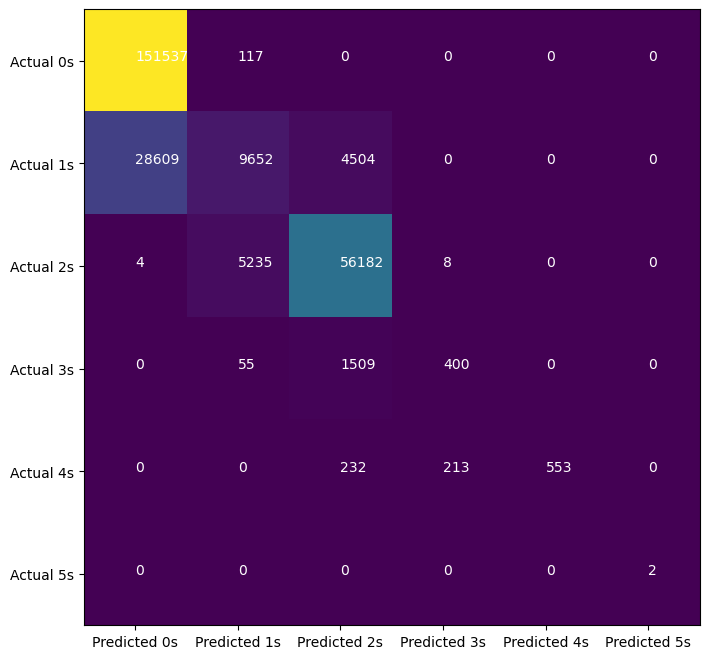

In [37]:
#Import matplotlib library for graphical visualization of confusion matrix

import matplotlib.pyplot as plt
cm=confusion_matrix(Y_Train,x_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4,5),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s','Predicted 5s'))
ax.yaxis.set(ticks=(0,1,2,3,4,5),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s','Actual 5s'))

#determine the y axis limit
ax.set_ylim(5.5,-0.5)

#loop for printing numbers in rows
for i in range(6):
    for j in range(6):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [39]:
#Predict the target column values in testing phase
y_pred=mdl.predict(X_Test)
y_pred

array([0, 0, 0, ..., 1, 2, 2], dtype=int64)

In [41]:
print(Y_Test)

[1 0 1 ... 1 2 2]


In [43]:
#Accuracy of the model

accuracy=accuracy_score(Y_Test,y_pred)
print("The accuracy of the model is" , accuracy)

The accuracy of the model is 0.8430854352126608


In [45]:

confusion_matrix(Y_Test,y_pred)

array([[37691,    30,     0,     0,     0],
       [ 7058,  2503,  1167,     0,     0],
       [    0,  1422, 14104,     4,     0],
       [    0,    11,   371,   105,     0],
       [    0,     0,    50,    40,   148]], dtype=int64)

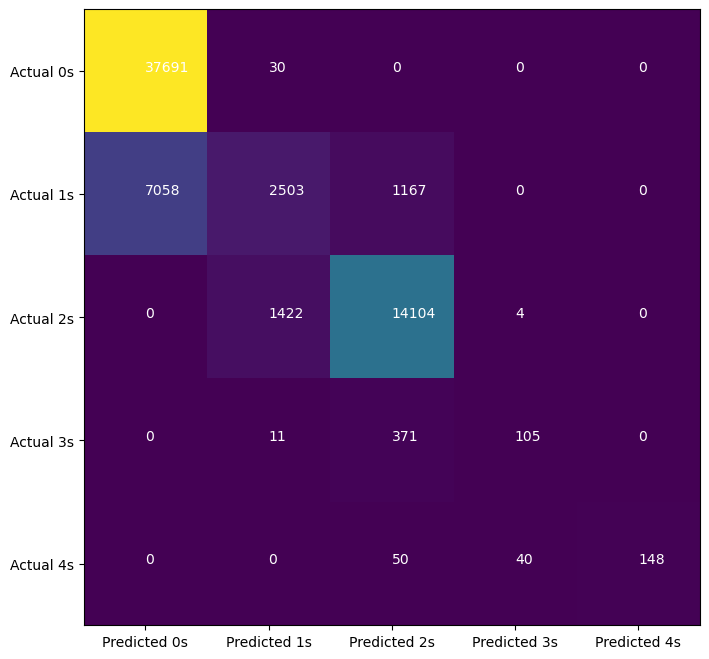

In [47]:
#Import matplotlib library for graphical visualization of confusion matrix

import matplotlib.pyplot as plt
cm=confusion_matrix(Y_Test,y_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s'))
ax.yaxis.set(ticks=(0,1,2,3,4),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s'))

#determine the y axis limit
ax.set_ylim(4.5,-0.5)

#loop for printing numbers in rows
for i in range(5):
    for j in range(5):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [49]:
#For printing the classification report

report = classification_report(Y_Test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     37721
           1       0.63      0.23      0.34     10728
           2       0.90      0.91      0.90     15530
           3       0.70      0.22      0.33       487
           4       1.00      0.62      0.77       238

    accuracy                           0.84     64704
   macro avg       0.82      0.60      0.65     64704
weighted avg       0.82      0.84      0.81     64704



<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>Logistic Regression</h1></div>

In [51]:
#Apply Logistic Regression

from sklearn.linear_model import LogisticRegression
mdl=LogisticRegression(solver='liblinear',random_state=26)

In [53]:
mdl.fit(X_Train,Y_Train)

LogisticRegression(random_state=26, solver='liblinear')

In [55]:
#Predict the Y values in training
x_pred=mdl.predict(X_Train)
x_pred

array([2, 0, 0, ..., 0, 2, 0], dtype=int64)

In [57]:
#Accuracy of the training
accuracy=accuracy_score(Y_Train,x_pred)
print("The accuracy of the model in training is" , accuracy)

The accuracy of the model in training is 0.9607552972814244


In [59]:

confusion_matrix(Y_Train,x_pred)

array([[151654,      0,      0,      0,      0,      0],
       [     7,  35578,   7180,      0,      0,      0],
       [     0,      6,  61423,      0,      0,      0],
       [     0,      0,   1964,      0,      0,      0],
       [     0,      0,    998,      0,      0,      0],
       [     0,      0,      2,      0,      0,      0]], dtype=int64)

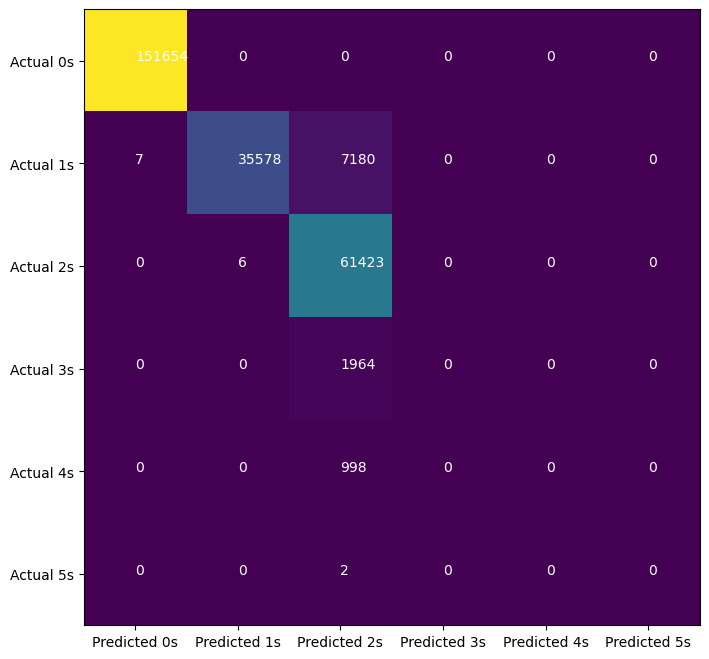

In [61]:
#Import matplotlib library for graphical visualization of confusion matrix

import matplotlib.pyplot as plt
cm=confusion_matrix(Y_Train,x_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4,5),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s','Predicted 5s'))
ax.yaxis.set(ticks=(0,1,2,3,4,5),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s','Actual 5s'))

#determine the y axis limit
ax.set_ylim(5.5,-0.5)

#loop for printing numbers in rows
for i in range(6):
    for j in range(6):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [63]:
#predict the Y values in testing
y_pred=mdl.predict(X_Test)
print(y_pred)

[1 0 1 ... 1 2 2]


In [65]:
#accuracy of the model
accuracy=accuracy_score(Y_Test,y_pred)
print("The accuracy of the model is" , accuracy)

The accuracy of the model is 0.9596933728981206


In [67]:
confusion_matrix(Y_Test,y_pred)

array([[37721,     0,     0,     0,     0],
       [    2,  8848,  1878,     0,     0],
       [    0,     3, 15527,     0,     0],
       [    0,     0,   487,     0,     0],
       [    0,     0,   238,     0,     0]], dtype=int64)

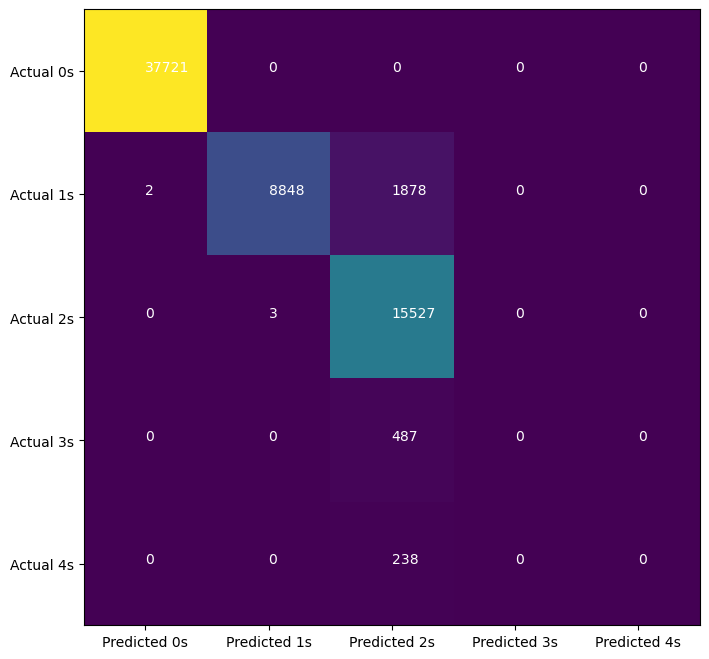

In [69]:
cm=confusion_matrix(Y_Test,y_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s'))
ax.yaxis.set(ticks=(0,1,2,3,4),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s'))

#determine the y axis limit
ax.set_ylim(4.5,-0.5)

#loop for printing numbers in rows
for i in range(5):
    for j in range(5):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [71]:
#Report of the model
report = classification_report(Y_Test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37721
           1       1.00      0.82      0.90     10728
           2       0.86      1.00      0.92     15530
           3       1.00      0.00      0.00       487
           4       1.00      0.00      0.00       238

    accuracy                           0.96     64704
   macro avg       0.97      0.56      0.57     64704
weighted avg       0.97      0.96      0.95     64704



<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>SVM Classification</h1></div>

In [73]:
#import SVC from sklearn
from sklearn.svm import SVC
mdl= SVC(kernel='linear') 
mdl.fit(X_Train, Y_Train) 
SVC(kernel='linear')

SVC(kernel='linear')

In [74]:
#predict the trainig y values
x_pred=mdl.predict(X_Train)
print(x_pred)

[2 0 0 ... 0 2 0]


In [75]:
#Training accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_Train,x_pred)
print("The training accuracy is",accuracy)

The training accuracy is 0.9999806809576063


In [76]:
from sklearn.metrics import classification_report,confusion_matrix
#Making confusion matrix
confusion_matrix(Y_Train,x_pred)

array([[151653,      1,      0,      0,      0,      0],
       [     0,  42761,      4,      0,      0,      0],
       [     0,      0,  61429,      0,      0,      0],
       [     0,      0,      0,   1964,      0,      0],
       [     0,      0,      0,      0,    998,      0],
       [     0,      0,      0,      0,      0,      2]], dtype=int64)

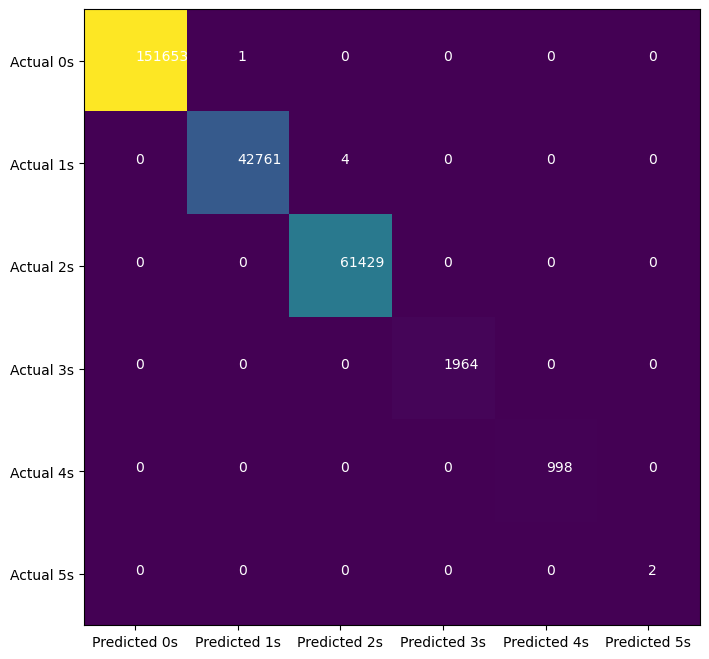

In [77]:
cm=confusion_matrix(Y_Train,x_pred)
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4,5),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s','Predicted 5s'))
ax.yaxis.set(ticks=(0,1,2,3,4,5),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s','Actual 5s'))

#determine the y axis limit
ax.set_ylim(5.5,-0.5)

#loop for printing numbers in rows
for i in range(6):
    for j in range(6):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [78]:
y_pred=mdl.predict(X_Test)
print(y_pred)

[1 0 1 ... 1 2 2]


In [79]:
#Models accuracy
accuracy=accuracy_score(Y_Test,y_pred)
print('The accuracy of the model is',accuracy)

The accuracy of the model is 0.9999536350148368


In [81]:
#Making confusion matrix
confusion_matrix(Y_Test,y_pred)

array([[37721,     0,     0,     0,     0],
       [    2, 10725,     1,     0,     0],
       [    0,     0, 15530,     0,     0],
       [    0,     0,     0,   487,     0],
       [    0,     0,     0,     0,   238]], dtype=int64)

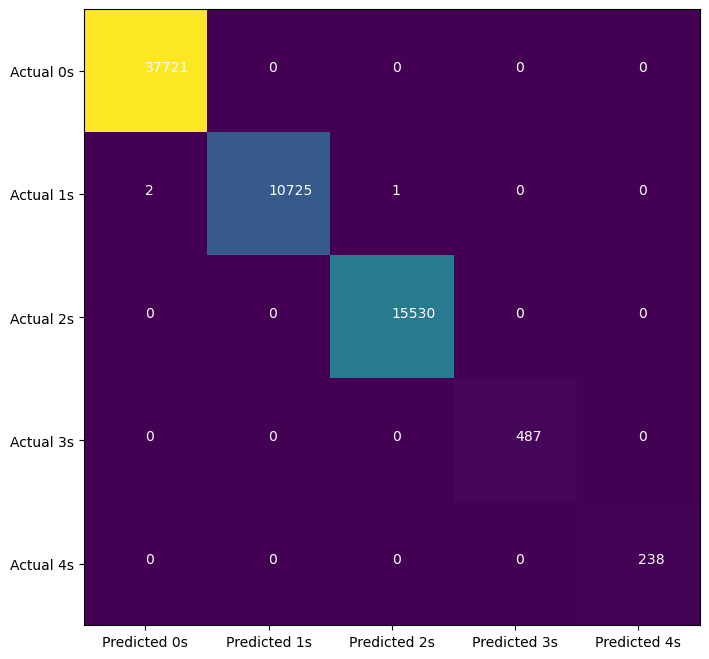

In [89]:
cm=confusion_matrix(Y_Test,y_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s'))
ax.yaxis.set(ticks=(0,1,2,3,4),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s'))

#determine the y axis limit
ax.set_ylim(4.5,-0.5)

#loop for printing numbers in rows
for i in range(5):
    for j in range(5):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [91]:
#Reort of the model
report = classification_report(Y_Test, y_pred,digits=6)
print(report)

              precision    recall  f1-score   support

           0   0.999947  1.000000  0.999973     37721
           1   1.000000  0.999720  0.999860     10728
           2   0.999936  1.000000  0.999968     15530
           3   1.000000  1.000000  1.000000       487
           4   1.000000  1.000000  1.000000       238

    accuracy                       0.999954     64704
   macro avg   0.999977  0.999944  0.999960     64704
weighted avg   0.999954  0.999954  0.999954     64704



<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>Decision Tree Classification</h1></div>

In [93]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with a random state for reproducibility
mdl= DecisionTreeClassifier(random_state=26)

# Fit the classifier to your training data
mdl.fit(X_Train, Y_Train)
DecisionTreeClassifier(random_state=26)


DecisionTreeClassifier(random_state=26)

In [94]:
x_pred=mdl.predict(X_Train)
print(x_pred)

[2 0 0 ... 0 2 0]


In [95]:
#Training accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_Train,x_pred)
print("The accuracy of the training of the model is",accuracy)

The accuracy of the training of the model is 1.0


In [96]:
#Making confusion matrix
confusion_matrix(Y_Train,x_pred)

array([[151654,      0,      0,      0,      0,      0],
       [     0,  42765,      0,      0,      0,      0],
       [     0,      0,  61429,      0,      0,      0],
       [     0,      0,      0,   1964,      0,      0],
       [     0,      0,      0,      0,    998,      0],
       [     0,      0,      0,      0,      0,      2]], dtype=int64)

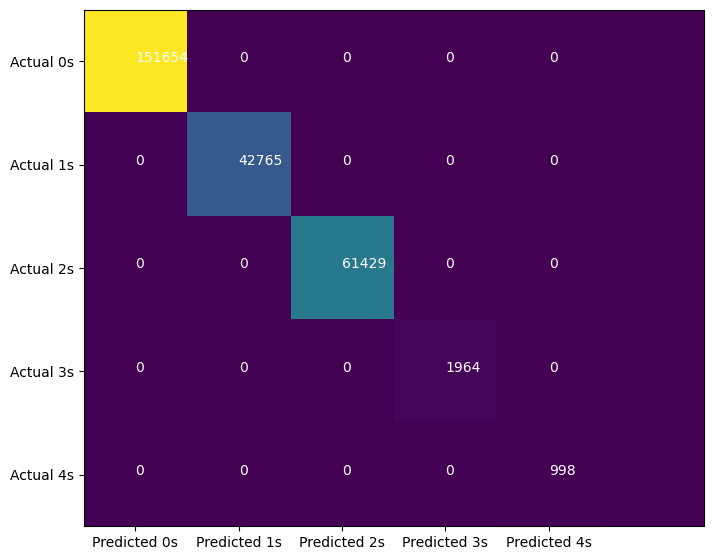

In [97]:
cm=confusion_matrix(Y_Train,x_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s'))
ax.yaxis.set(ticks=(0,1,2,3,4),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s'))

#determine the y axis limit
ax.set_ylim(4.5,-0.5)

#loop for printing numbers in rows
for i in range(5):
    for j in range(5):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [98]:
y_pred=mdl.predict(X_Test)
print(y_pred)

[1 0 1 ... 1 2 2]


In [109]:
#finding accuracy of model
accuracy=accuracy_score(Y_Test,y_pred)
print('The accuracy of the model is',accuracy)

The accuracy of the model is 0.9927206973293768


In [111]:
#Making confusion matrix
confusion_matrix(Y_Test,y_pred)

array([[37618,   103,     0,     0,     0],
       [  121, 10523,    83,     1,     0],
       [    1,    88, 15408,    33,     0],
       [    0,     0,    22,   456,     9],
       [    0,     0,     0,    10,   228]], dtype=int64)

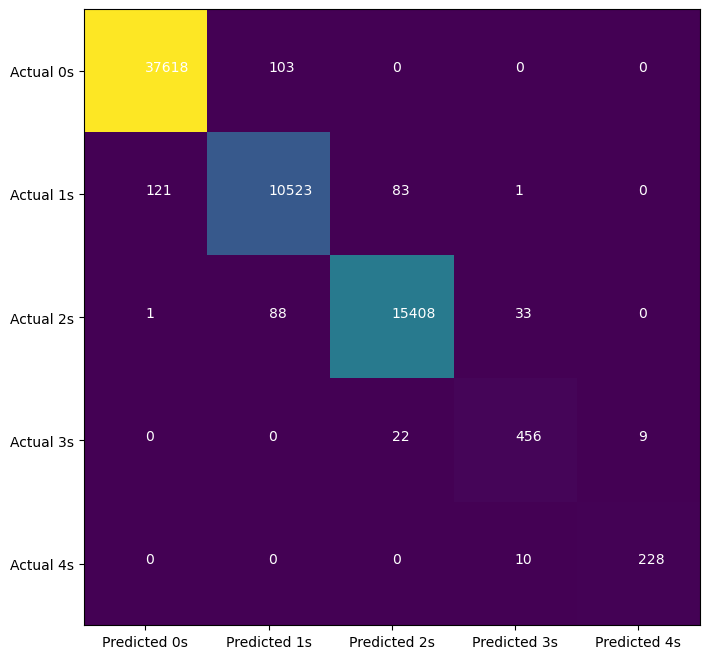

In [113]:
cm=confusion_matrix(Y_Test,y_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s'))
ax.yaxis.set(ticks=(0,1,2,3,4),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s'))

#determine the y axis limit
ax.set_ylim(4.5,-0.5)

#loop for printing numbers in rows
for i in range(5):
    for j in range(5):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [115]:
#Report of the model
report = classification_report(Y_Test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37721
           1       0.98      0.98      0.98     10728
           2       0.99      0.99      0.99     15530
           3       0.91      0.94      0.92       487
           4       0.96      0.96      0.96       238

    accuracy                           0.99     64704
   macro avg       0.97      0.97      0.97     64704
weighted avg       0.99      0.99      0.99     64704



<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>Random Forest Classification</h1></div>

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier with the specified number of estimators and random state
mdl = RandomForestClassifier(n_estimators=5, random_state=26)

# Fit the classifier to your training data
mdl.fit(X_Train, Y_Train)
RandomForestClassifier(n_estimators=5, random_state=26)




RandomForestClassifier(n_estimators=5, random_state=26)

In [33]:
x_pred=mdl.predict(X_Train)
print(x_pred)

[2 0 0 ... 0 2 0]


In [34]:
#accuracy of the traing 

acuracy=accuracy_score(Y_Train,x_pred)
print('The accuracy of the training is',acuracy)

The accuracy of the training is 0.9999459066812976


In [38]:
#Making confusion matrix
confusion_matrix(Y_Train,x_pred)

array([[151653,      1,      0,      0,      0,      0],
       [     1,  42764,      0,      0,      0,      0],
       [     0,      2,  61427,      0,      0,      0],
       [     0,      0,      9,   1955,      0,      0],
       [     0,      0,      1,      0,    997,      0],
       [     0,      0,      0,      0,      0,      2]], dtype=int64)

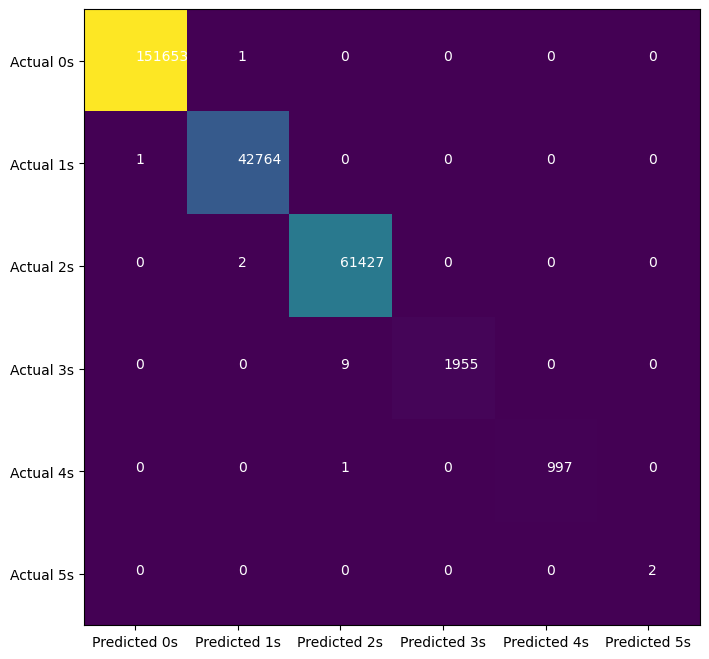

In [40]:
cm=confusion_matrix(Y_Train,x_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4,5),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s','Predicted 5s'))
ax.yaxis.set(ticks=(0,1,2,3,4,5),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s','Actual 5s'))

#determine the y axis limit
ax.set_ylim(5.5,-0.5)

#loop for printing numbers in rows
for i in range(6):
    for j in range(6):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [42]:
#predict the y-column of testing part
y_pred=mdl.predict(X_Test)
print(y_pred)

[1 0 1 ... 1 2 2]


In [44]:
#Models accuracy
accuracy=accuracy_score(Y_Test,y_pred)
print('The accuracy of the model is',accuracy)

The accuracy of the model is 0.9991808852621167


In [46]:
#Making confusion matrix
confusion_matrix(Y_Test,y_pred)

array([[37721,     0,     0,     0,     0],
       [    8, 10720,     0,     0,     0],
       [    0,     9, 15521,     0,     0],
       [    0,     3,    23,   461,     0],
       [    0,     0,     2,     8,   228]], dtype=int64)

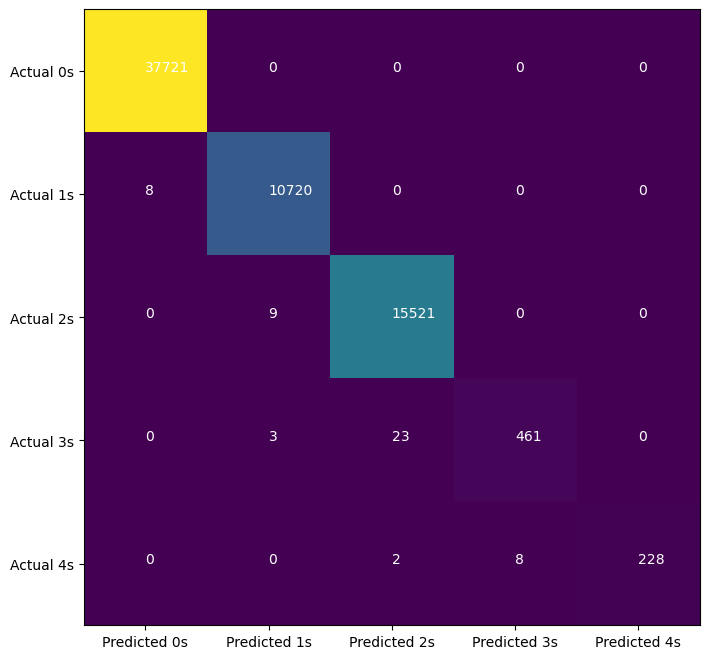

In [48]:
cm=confusion_matrix(Y_Test,y_pred)
fig,ax=plt.subplots(figsize=(8,8))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2,3,4),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s','Predicted 3s','Predicted 4s'))
ax.yaxis.set(ticks=(0,1,2,3,4),ticklabels=('Actual 0s','Actual 1s','Actual 2s','Actual 3s','Actual 4s'))

#determine the y axis limit
ax.set_ylim(4.5,-0.5)

#loop for printing numbers in rows
for i in range(5):
    for j in range(5):
        ax.text(j,i,cm[i,j],  color='white')
plt.show()

In [52]:
#Making report
report = classification_report(Y_Test, y_pred,digits=6)
print(report)

              precision    recall  f1-score   support

           0   0.999788  1.000000  0.999894     37721
           1   0.998882  0.999254  0.999068     10728
           2   0.998392  0.999420  0.998906     15530
           3   0.982942  0.946612  0.964435       487
           4   1.000000  0.957983  0.978541       238

    accuracy                       0.999181     64704
   macro avg   0.996001  0.980654  0.988169     64704
weighted avg   0.999177  0.999181  0.999174     64704



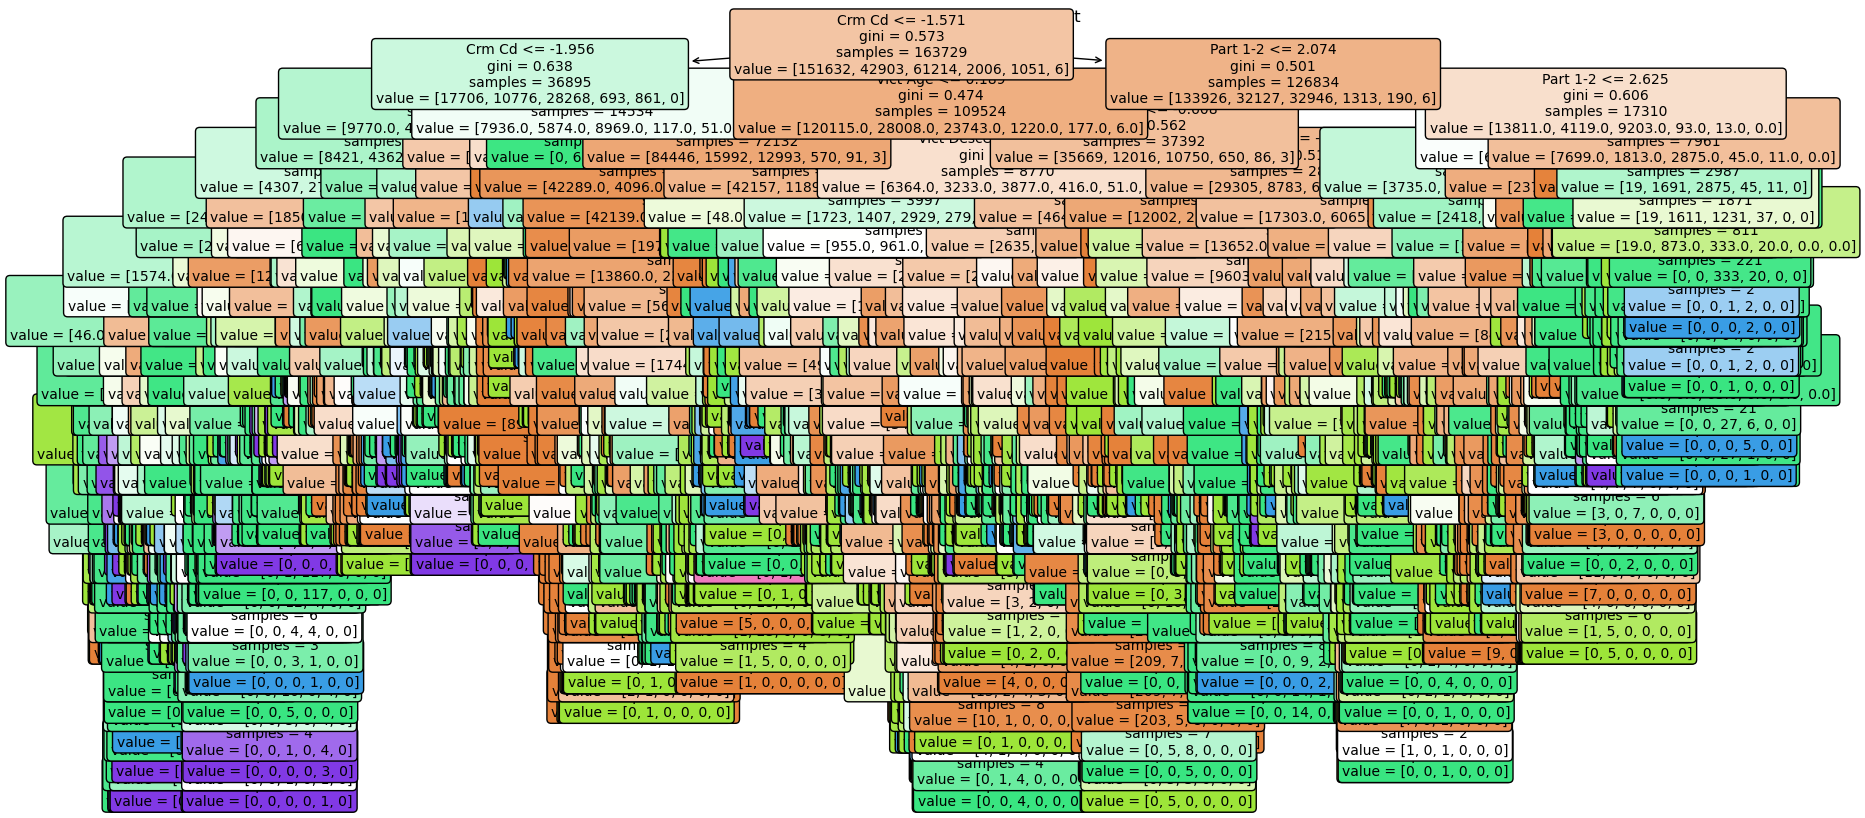

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = mdl.estimators_[3]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), 
filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

<div style="text-align:center;color:red ; font-size:2rem"> <h1>Results</h1></div>

### Naive Base:    Training 84%     Testing 84%
### Logistic Regression:   Training 96%     Testing 95%
### SVM :   Training 99%    Testing 99%
### Decision Tree:    Training 100%     Testing 99%
### Random Forest :   Training 99%     Testing 99%

<div style="text-align:center;color:red ; font-size:1.5rem"> <h1> Best Results</h1></div>

## SVM , Decision Tree and Random Forest all have good results in training and testing 
